
# Loading and Processing Hydrological Model Outputs

This example demonstrates how to load and process outputs from different 
hydrological models using PyHydroGeophysX. We show examples for both 
ParFlow and MODFLOW models.

The example covers:
- Loading ParFlow saturation and porosity data
- Loading MODFLOW water content and porosity data  
- Basic visualization of the loaded data

This is typically the first step in any workflow where you want to
convert hydrological model outputs to geophysical data.


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# For Jupyter notebooks, use the current working directory
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()
# Add the parent directory (OPEN_ERT) to the path
parent_dir = os.path.dirname(os.path.dirname(current_dir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from PyHydroGeophysX.model_output.parflow_output import ParflowSaturation, ParflowPorosity

from PyHydroGeophysX.model_output.modflow_output import MODFLOWWaterContent, MODFLOWPorosity

## 1. Parflow example



Load saturation data



In [2]:
saturation_processor = ParflowSaturation(
    model_directory="C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/data/parflow/test2",
    run_name="test2"
)
saturation = saturation_processor.load_timestep(200)  # Load first timestep

# Load porosity data
porosity_processor = ParflowPorosity(
    model_directory="C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/data/parflow/test2",
    run_name="test2"
)
porosity = porosity_processor.load_porosity()

mask = porosity_processor.load_mask()
mask.shape
porosity[mask==0] = np.nan
saturation[mask==0] = np.nan

(20, 50, 48)


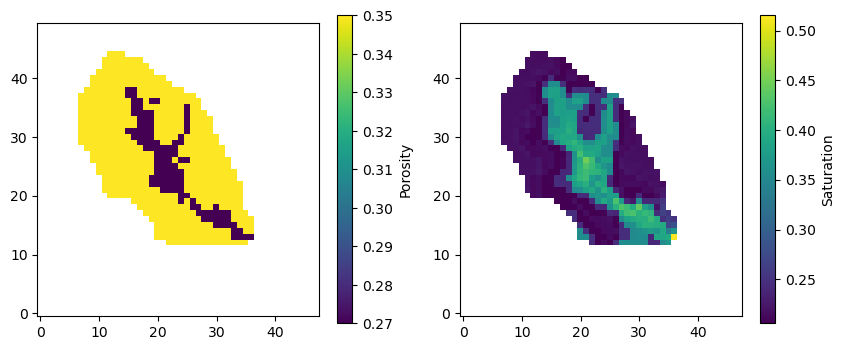

In [3]:
print(saturation.shape)
# Plotting the data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(porosity[19, :, :], cmap='viridis')
plt.colorbar(label='Porosity')
plt.gca().invert_yaxis()
plt.subplot(1, 2, 2)
plt.imshow(saturation[19, :, :], cmap='viridis')
plt.colorbar(label='Saturation')
plt.gca().invert_yaxis()

## 2. MODFLOW example



These would be your actual data files



In [4]:
data_dir = "C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/data/"
modflow_dir = os.path.join(data_dir, "modflow")
idomain = np.loadtxt(os.path.join(modflow_dir, "id.txt"))

# Initialize MODFLOW water content processor
water_content_processor = MODFLOWWaterContent(
    model_directory=modflow_dir,  # Changed from sim_ws
    idomain=idomain
)

# Load water content for a specific timestep
timestep = 1
water_content = water_content_processor.load_timestep(timestep)

print(water_content.shape)


# Path to your MODFLOW model directory

model_name = "TLnewtest2sfb2"  # Your model name

# 1. Create an instance of the MODFLOWPorosity class
porosity_loader = MODFLOWPorosity(
    model_directory=modflow_dir,
    model_name=model_name
)
# 2. Load the porosity data
porosity_data = porosity_loader.load_porosity()

(3, 37, 31)


loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package sto...
    loading package oc...
    loading package drn...
    loading package sfr...
    loading package uzf...


    loading package ghb...
    loading package mvr...
  loading solution package tlnewtest2sfb2...


Plotting the data



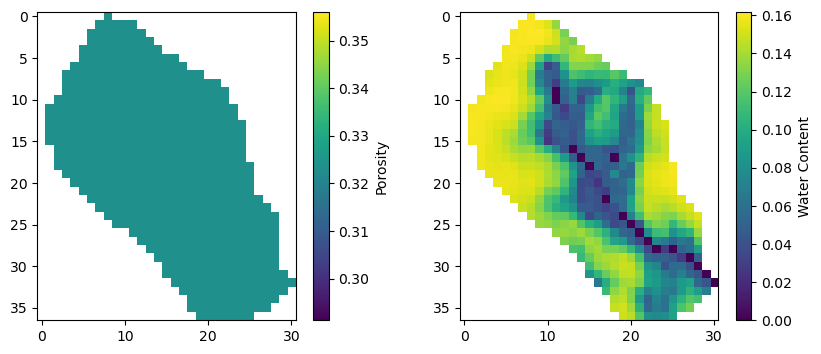

In [5]:
porosity_data1 = porosity_data[0, :, :]
porosity_data1[idomain==0] = np.nan

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(porosity_data1[ :, :], cmap='viridis')
plt.colorbar(label='Porosity')

plt.subplot(1, 2, 2)
plt.imshow(water_content[0, :, :], cmap='viridis')
plt.colorbar(label='Water Content')